In [8]:
import numpy as np
import os
import matplotlib.pyplot as plt
from tensorflow.python.summary.summary_iterator import summary_iterator

2023-02-25 21:42:53.352954: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-25 21:43:02.689548: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/slurm/lib64:
2023-02-25 21:43:02.689572: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-02-25 21:43:03.552264: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-02-25 21:43:20.1687

In [28]:
import numpy as np

beta_max = 20
beta_min = 0.01
t = 1

def alpha(beta_max, beta_min, t, tau):
    return np.exp(((-t**2 + tau**2)/4)*(beta_max - beta_min) - (t - tau) * beta_min /2 )

def g(beta_max, beta_min, t, tau):
    return beta_min + tau * (beta_max - beta_min)

def sigma(beta_max, beta_min, t, tau):
    return np.sqrt(1 - np.exp(((-tau**2)/2)*(beta_max - beta_min) - (tau) * beta_min))

def loss_weight(beta_max, beta_min, t, tau):
    return alpha(beta_max, beta_min, 1, tau) * g(beta_max, beta_min, t, tau) **2 / sigma(beta_max, beta_min, t, tau)

def SNR(tau):
    return alpha(beta_max, beta_min, tau, 0) / sigma(beta_max, beta_min, 0, tau)**2



In [13]:
loss_weight(beta_max, beta_min, t, 0.01)

0.04507794699826982

In [18]:
def load_loss(train_name = "dpm", t="005"):
    root = "/scratch/qingqu_root/qingqu1/shared_data/dpm_experiments"
    loss_path = os.path.join(root, train_name, f"noise_loss_t{t}")
    loss_list = []
    t_list = []
    for i in range(1, 41):
        loss_file_dir = os.path.join(loss_path, f"ckpt_{i}_loss.npz")
        loss = np.load(loss_file_dir)["mean_loss"]
        loss_list.append(loss.item())
        t_list.append(i * 1e5)
    return t_list, loss_list 

def loadfromtensorboard(path):
    loss_list = []
    t_list = []
    summary = summary_iterator(path)
    for e in summary:
        for v in e.summary.value:
            if v.tag == 'eval_loss':
                loss_list.append(v.simple_value)
                t_list.append(e.step)
    return t_list, loss_list 

Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`


Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`


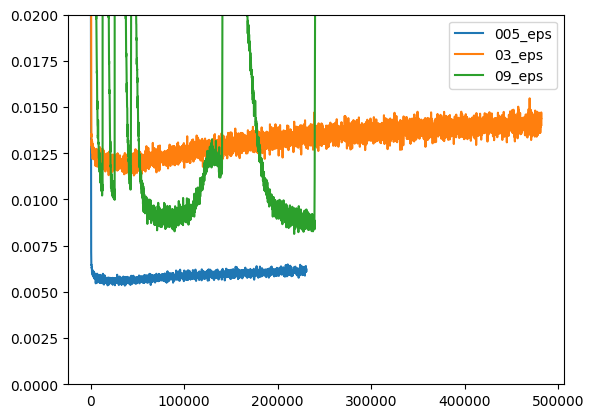

In [6]:

t_list, loss_list = loadfromtensorboard("/scratch/qingqu_root/qingqu1/shared_data/dpm_experiments/dpm_005_eps/tensorboard/events.out.tfevents.1676514856.gl1506.arc-ts.umich.edu.2518587.0")
plt.plot(t_list, loss_weight(beta_max, beta_min, t, 0.050950001925230026) * np.array(loss_list), label='005_eps')
t_list, loss_list = loadfromtensorboard("/scratch/qingqu_root/qingqu1/shared_data/dpm_experiments/dpm_03_eps/tensorboard/events.out.tfevents.1676427322.gl1524.arc-ts.umich.edu.317631.0")
plt.plot(t_list, loss_weight(beta_max, beta_min, t, 0.30069997906684875) * np.array(loss_list), label='03_eps')
t_list, loss_list = loadfromtensorboard("/scratch/qingqu_root/qingqu1/shared_data/dpm_experiments/dpm_09_eps/tensorboard/events.out.tfevents.1677184339.gl1503.arc-ts.umich.edu.406004.0")
plt.plot(t_list, loss_weight(beta_max, beta_min, t, 0.9000999927520752) * np.array(loss_list), label='09_eps')
plt.ylim([0, 0.02])
# plt.xlim([0, 0.1])
plt.legend()
plt.show()

In [ ]:
loss_weight(beta_max, beta_min, t, 0.0010000000474974513)
t_list, loss_list = load_loss(train_name = "dpm", t="000")
loss_list

In [ ]:
for i in range(0, 100, 5):
    print(f"{i:03d}")

In [16]:
np.arange(0.001, 1, 1/20)

array([0.001     , 0.04861905, 0.0962381 , 0.14385714, 0.19147619,
       0.23909524, 0.28671429, 0.33433333, 0.38195238, 0.42957143,
       0.47719048, 0.52480952, 0.57242857, 0.62004762, 0.66766667,
       0.71528571, 0.76290476, 0.81052381, 0.85814286, 0.9057619 ,
       0.95338095])

In [14]:
loss_weight(beta_max, beta_min, t, 0)

/tmp/ipykernel_1694248/3529716024.py:17: RuntimeWarning: divide by zero encountered in double_scalars
  return alpha(beta_max, beta_min, 1, tau) * g(beta_max, beta_min, t, tau) **2 / sigma(beta_max, beta_min, t, tau)


inf

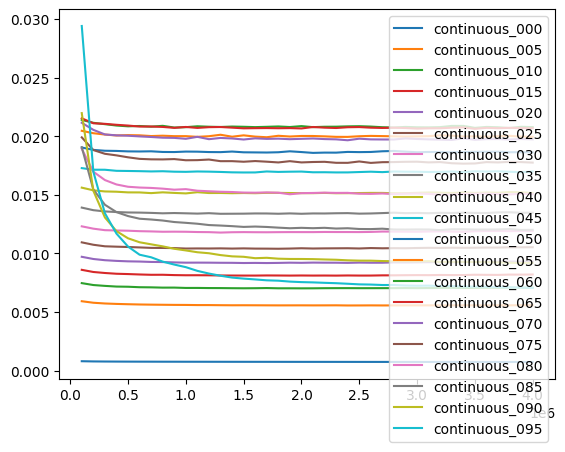

In [30]:
time_step = np.array([0.0010000000474974513,0.050950001925230026,0.10090000182390213,0.15084998309612274,0.20079998672008514,0.25074997544288635,
0.30069997906684875,0.35064995288848877,0.40059995651245117,0.4505499303340912,0.5004999041557312,0.5504499673843384,0.6003999710083008,
0.6503499746322632,0.7002999782562256,0.750249981880188,0.8001999258995056,0.8501499891281128,0.9000999927520752,0.950049877166748,1.0])

for idx, i in enumerate(range(0, 100, 5)):
    t_list, loss_list = load_loss(train_name = "dpm", t=f"{i:03d}")
    plt.plot(t_list, loss_weight(beta_max, beta_min, t, time_step[idx]) * np.array(loss_list), label=f'continuous_{i:03d}')

# t_list, loss_list = load_loss(train_name = "dpm", t="005")
# plt.plot(t_list, loss_weight(beta_max, beta_min, t, 0.050950001925230026) * np.array(loss_list), label='continuous_005')

# t_list, loss_list = load_loss(train_name = "dpm", t="010")
# plt.plot(t_list, loss_weight(beta_max, beta_min, t, 0.1) * np.array(loss_list), label='continuous_010')

# t_list, loss_list = load_loss(train_name = "dpm", t="030")
# plt.plot(t_list, loss_weight(beta_max, beta_min, t, 0.30069997906684875) * np.array(loss_list), label='continuous_030')

# t_list, loss_list = load_loss(train_name = "dpm", t="090")
# plt.plot(t_list, loss_weight(beta_max, beta_min, t, 0.9000999927520752) * np.array(loss_list), label='continuous_090')


plt.legend()
plt.show()

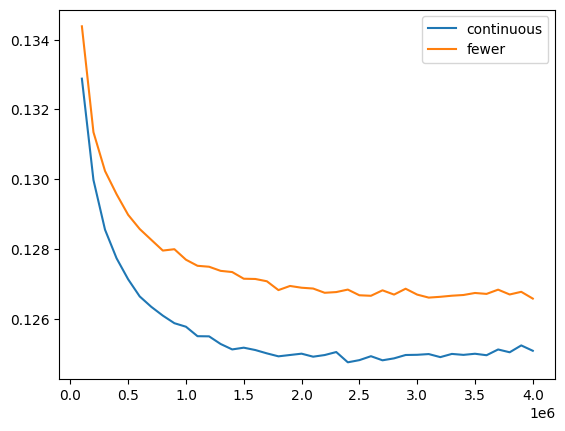

In [14]:
t_list, loss_list = load_loss(train_name = "dpm", t="005")
plt.plot(t_list, loss_list, label='continuous')
t_list, loss_list = load_loss(train_name = "dpm_fewer", t="005")
plt.plot(t_list, loss_list, label='fewer')
t_list, loss_list = loadfromtensorboard("/scratch/qingqu_root/qingqu1/shared_data/dpm_experiments/dpm_005_eps/tensorboard/events.out.tfevents.1676514856.gl1506.arc-ts.umich.edu.2518587.0")
plt.plot(t_list, loss_list, label='single')
# t_list, loss_list = load_loss(train_name = "dpm", t="030")
# plt.plot(t_list, loss_list, label='030')
# t_list, loss_list = load_loss(train_name = "dpm", t="090")
# plt.plot(t_list, loss_list, label='090')
plt.legend()
# plt.ylim([0.1, 0.2])
# plt.xlim([0, 0.1])
plt.show()

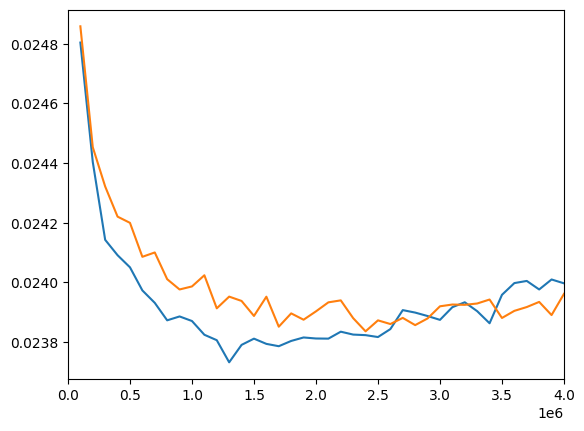

In [12]:
t_list, loss_list = load_loss(train_name = "dpm", t="030")
plt.plot(t_list, loss_list, label='continuous')
t_list, loss_list = load_loss(train_name = "dpm_fewer", t="030")
plt.plot(t_list, loss_list, label='fewer')
# t_list, loss_list = loadfromtensorboard("/scratch/qingqu_root/qingqu1/shared_data/dpm_experiments/dpm_one_step/tensorboard/events.out.tfevents.1676427322.gl1524.arc-ts.umich.edu.317631.0")
# plt.plot(t_list, loss_list, label='single')
# plt.ylim([0.2, 0.3])
plt.xlim([0, 4e6])
plt.show()

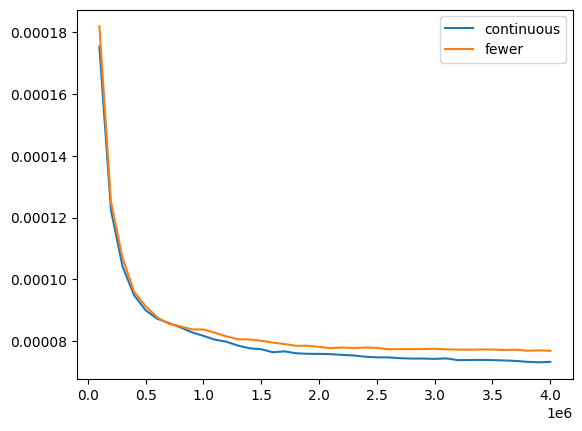

In [16]:
t_list, loss_list = load_loss(train_name = "dpm", t="090")
plt.plot(t_list, loss_list, label='continuous')

# t_list, loss_list2 = loadfromtensorboard("/scratch/qingqu_root/qingqu1/shared_data/dpm_experiments/dpm_last/tensorboard/events.out.tfevents.1677165376.gl1512.arc-ts.umich.edu.142644.0")
# plt.plot(t_list, loss_list2, label='single')
# t_list, loss_list = load_loss(train_name = "dpm", t="030")
# plt.plot(t_list, loss_list, label='030')
# t_list, loss_list = load_loss(train_name = "dpm", t="090")
# plt.plot(t_list, loss_list, label='090')
plt.legend()
# plt.ylim([0.0, 0.0005])
# plt.xlim([0, 1e6])
plt.show()